In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing the libraries

In [ ]:
# load the data
import pandas as pd
import numpy as np
import nltk


#Read the data set

In [ ]:
sms = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin-1')

In [ ]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
sms=sms.drop({"Unnamed: 2", "Unnamed: 3", "Unnamed: 4"}, axis= 1)
sms=sms.rename(columns={"v1":"label", "v2":"text"})
sms.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Explore the data**

In [ ]:
print("no of rows", len(sms))

no of rows 5572


In [ ]:
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
sms.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
sms['length']=sms['text'].apply(len)
sms.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Plot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

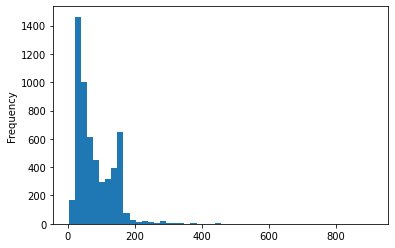

In [ ]:
sms['length'].plot(bins=50, kind='hist')

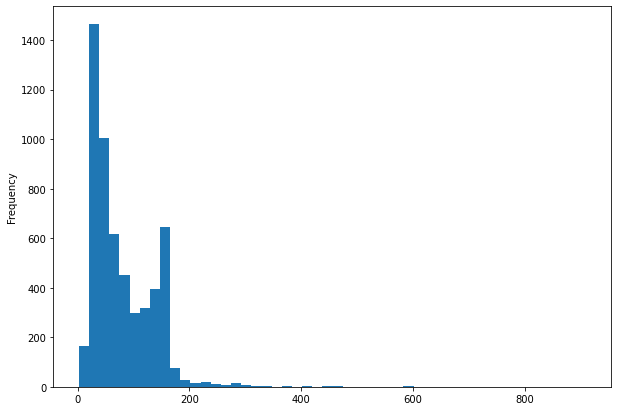

In [ ]:
sms['length'].plot(bins=50, kind='hist',figsize=(10, 7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efda854ae90>,
      dtype=object)

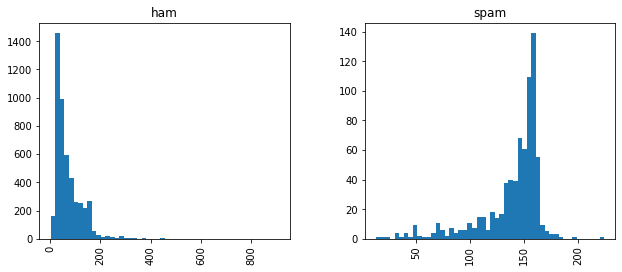

In [ ]:
sms.hist(column='length',by='label', bins=50, figsize=(10,4))

In [ ]:
sms.loc[:, 'label']= sms.label.map({'ham':0, 'spam':1})
sms.head()

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


**Implement Bag of words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
count = CountVectorizer()

text = count.fit_transform(sms['text'], input)

x_train, x_test, y_train, y_test = train_test_split(text, sms['label'], test_size=0.20, random_state=1)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(sms['text'], sms['label'], test_size=0.20, random_state=1)
text

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [ ]:
x_train = count.fit_transform(x_train)
x_test = count.fit_transform(x_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)

input = text[5571]

(4457, 8672)
(1115, 8672)


In [ ]:
x_train

<4457x7774 sparse matrix of type '<class 'numpy.int64'>'
	with 59357 stored elements in Compressed Sparse Row format>

#Creating & Implementation of ML model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model= MultinomialNB()


#Fit the model

In [ ]:
model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
prediction = model.predict(x_test)

In [ ]:
print(prediction)

[0 0 0 ... 0 0 0]


#Evaluating the model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
print("Accuracy score: {}".format(accuracy_score(y_test, prediction)))

Accuracy score: 0.97847533632287


In [ ]:
print("Precision score: {}".format(precision_score(y_test, prediction)))

Precision score: 0.891156462585034


In [ ]:
print("Recall score: {}".format(recall_score(y_test, prediction)))

Recall score: 0.9424460431654677


In [ ]:
print("F1 score: {}".format(f1_score(y_test, prediction)))

F1 score: 0.9160839160839161


**Naive bayes Prediction **

In [ ]:
from sklearn.naive_bayes import BernoulliNB
model= BernoulliNB()
model.fit(x_train, y_train)

BernoulliNB()

In [ ]:
prediction = model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy score: {}".format(accuracy_score(y_test, prediction)))
print("Precision score: {}".format(precision_score(y_test, prediction)))
print("Recall score: {}".format(recall_score(y_test, prediction)))
print("F1 score: {}".format(f1_score(y_test, prediction)))

Accuracy score: 0.9865470852017937
Precision score: 0.984375
Recall score: 0.9064748201438849
F1 score: 0.9438202247191011


# defining the LSTM model
**MLPClassifier Prediction**

In [ ]:
from sklearn.neural_network import MLPClassifier
model= MLPClassifier()
model.fit(x_train, y_train)

MLPClassifier()

In [ ]:
prediction = model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("MLPClassifier")
print("Accuracy score: {}".format(accuracy_score(y_test, prediction)))
print("Precision score: {}".format(precision_score(y_test, prediction)))
print("Recall score: {}".format(recall_score(y_test, prediction)))
print("F1 score: {}".format(f1_score(y_test, prediction)))

MLPClassifier
Accuracy score: 0.9928251121076234
Precision score: 1.0
Recall score: 0.9424460431654677
F1 score: 0.9703703703703704


In [ ]:
input =['I am ok']
input=count.fit_transform(input)
input

<1x2 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
count = CountVectorizer()
input=["'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
text = count.fit_transform(sms['text'], input)

x_train, x_test, y_train, y_test = train_test_split(text, sms['label'], test_size=0.20, random_state=1)


In [ ]:
text

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [ ]:
sms['text']
input ="To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode"

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

#Testing the Model

In [ ]:
data=sms['text']
input ="REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode"

In [ ]:
data

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [ ]:
data.loc[len(data.index)]="REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode"

In [ ]:
data

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5572    Free entry in 2 a wkly comp to win FA Cup fina...
5573    Why don't you wait 'til at least wednesday to ...
5574    Why don't you wait 'til at least wednesday to ...
5575    Why don't you wait 'til at least wednesday to ...
5576    REMINDER FROM O2: To get 2.50 pounds free call...
Name: text, Length: 5577, dtype: object

In [ ]:
text=count.fit_transform(data)

In [ ]:
text

<5577x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 74004 stored elements in Compressed Sparse Row format>

In [ ]:
input=text[5572]

In [ ]:
model.predict(input)

array([1])

In [ ]:
#array =['ham', 'spam'] => ham=0, spam =1

**Testing sample-2:**




In [ ]:
text

<5574x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73952 stored elements in Compressed Sparse Row format>

In [ ]:
data
data.loc[len(data.index)]="Why don't you wait 'til at least wednesday to see if you get your."
#data
text=count.fit_transform(data)
#text
input=text[5574]
model.predict(input)



array([0])

**Testing sample-3:**

In [ ]:
data=sms['text']
input="Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
data.loc[len(data.index)]="Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
text=count.fit_transform(data)
text

<5573x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73939 stored elements in Compressed Sparse Row format>

In [ ]:
input=text[5572]
model.predict(input)

array([1])